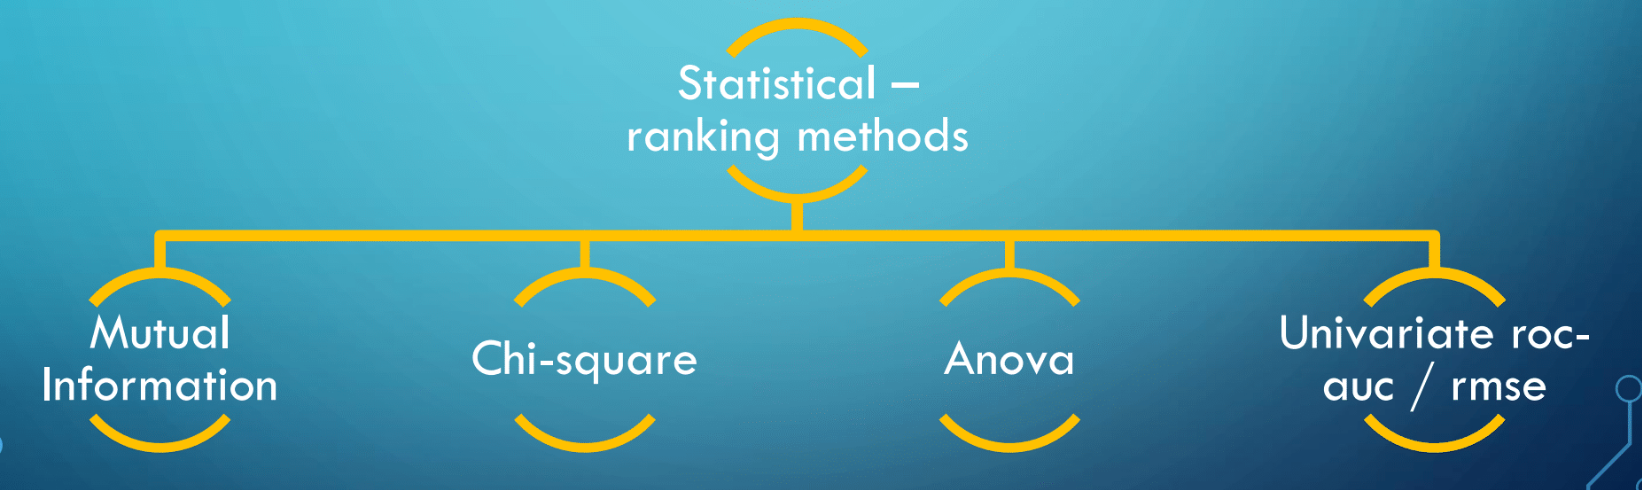

There are two steps in statistical feature selection

**Rank features by importance**
* Mutual information
* Chi-square
* Anova
* Anova

**Select the highest ranking features**
* Highest mutual information
* Lowest P-values

# Mutual information
The mutual information measures the reduction in uncertainty in variable A when variable B is known.

To select variables, we are interested in the mutual information between the predictor variables and the target. Higher mutual information values, indicate little uncertainty about the target Y given the predictor X.

## Determine Mutual Information


##Classification

In [ ]:
# to obtain the mutual information values
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [ ]:
# Step 1: Calculate the mutual information between the variables and the target
# Compute mutual information scores for each feature with respect to the target variable
mi = mutual_info_classif(X_train, y_train)

# Step 2: Capture the mutual information values in a pandas Series
# Convert the array of mutual information scores to a pandas Series for easier manipulation
mi = pd.Series(mi)

# Step 3: Add the variable names as the index of the Series
# Assign the feature names from X_train as the index of the Series
mi.index = X_train.columns

# Step 4: Sort the features based on their mutual information values
# Sort the Series in descending order to see which features have the most information about the target
mi = mi.sort_values(ascending=False)

# Step 5: Plot the mutual information values
# Create a bar plot of mutual information scores for visualization
mi.plot.bar(figsize=(20, 6))  # Plot with a larger figure size for clarity
plt.ylabel('Mutual Information')  # Label the y-axis
plt.title('Feature Importance based on Mutual Information')  # Optional: Add a title for context
plt.show()  # Display the plot

Once we find the mutual information values, to select features we need to determine a threshold, or cut-off value, above which a feature will be selected.

There are a few ways in which this can be done:

* Select top k features, where k is an arbitrary number of features
* Select features in the top n percentile, where n is again an arbitrary number
* Select all features above a certain threshold of MI, arbitrarily decided.

Scikit-learn transformer SelectKBest, allows us to automatically select the top k features, based of any statistical value, including the MI.

Sklearn's SelectPercentile allows us to select the features in the top percentile of any statistical value, including the MI.

Alternatively, if we want to select features based on a MI threshold, we can do it manually.

### Select top k features based on MI

## Regression

In [ ]:
# Step 1: Select the top 10 features based on mutual information
# Use SelectKBest to select the top 10 features that have the highest mutual information with the target
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train, y_train)

# Step 2: Display the names of the selected features
# Get the names of the features that were selected based on mutual information scores
selected_features = X_train.columns[sel_.get_support()]
print('Selected features:', selected_features)

# Step 3: Transform the training and test data to keep only the selected features
# Remove the unselected features from both the training and test datasets
X_train = sel_.transform(X_train)  # Apply the feature selection to the training data
X_test = sel_.transform(X_test)    # Apply the same feature selection to the test data

### Select top 10th percentile features

In [ ]:
# Step 1: Select features in the top percentile using mutual information regression
# This selects the features that are in the top 10% of importance based on mutual information
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train, y_train)

# Step 2: Display the selected feature names
# This retrieves the names of the features that were selected in the top percentile
X_train.columns[sel_.get_support()]

# Step 3: Remove the rest of the features from the training dataset
# This keeps only the selected features and discards the others
X_train = sel_.transform(X_train)

# Step 4: Remove the rest of the features from the test dataset
# This ensures the test dataset has the same selected features as the training dataset
X_test = sel_.transform(X_test)

# Step 5: Display the transformed training dataset
# This shows the training data with only the top percentile features
X_train

# Chi-Squared

Compute chi-squared test between categorical features and classification target.

**Step-by-Step for Chi-Square in Feature Selection:**
* Step 1: Identify the categorical feature and target.
* Step 2: Build a contingency table showing observed counts.
* Step 3: Calculate the expected frequencies assuming no relationship between feature and target.
* Step 4: Perform the Chi-Square test to measure the difference between observed and expected values.
* Step 5: Check the Chi-Square value and the p-value:
* **High Chi-Square + Low p-value = Feature is important for predicting the target.**
* **Low Chi-Square + High p-value = Feature is not significant.**
* Step 6: If the feature has a high Chi-Square and low p-value, keep it; otherwise, drop it from the model.


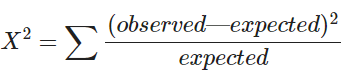

In [ ]:
from scipy.stats import chi2_contingency

# Step 1: Create a contingency table showing counts of each combination of target and sex
# This table helps to compare observed vs. expected frequencies
c = pd.crosstab(y_train, X_train['sex'])

# Step 2: Display the contingency table
# This allows you to see the actual counts for each category
c

# Step 3: Perform the Chi-Square test on the contingency table
# This test assesses whether there is a significant relationship between target and sex
chi2_contingency(c)

### To rank all features


In [ ]:
# To rank all features by their significance using Chi-Square test

# Initialize an empty list to store p-values for each feature
chi_ls = []

# Loop through each feature in the training data
for feature in X_train.columns:

    # Step 1: Create a contingency table for the current feature
    # This table shows the counts of each combination of target and feature values
    c = pd.crosstab(y_train, X_train[feature])

    # Step 2: Perform the Chi-Square test on the contingency table
    # Extract the p-value to assess the significance of the feature
    p_value = chi2_contingency(c)[1]

    # Step 3: Append the p-value to the list
    # This value will be used to rank features by their importance
    chi_ls.append(p_value)

# Step 4: Convert the list of p-values to a pandas Series with feature names as index
# Sort the features by p-value in ascending order
# Features with lower p-values are considered more important
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)

# Step 5: Label the y-axis and add a title to the plot
# This helps to understand the plot and identify important features
plt.ylabel('p value')
plt.title('Feature importance based on chi-square test')

In [ ]:
# Step 1: Select the top 3 features based on their p-values
# This selects the 3 most significant features from the chi-square test
selected = pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True)[0:3].index

# Step 2: Display the selected features
# This shows the names of the top 3 features chosen
selected

# Step 3: Convert the selected features from numpy arrays to pandas DataFrames
# This ensures the features are in DataFrame format for easier manipulation
X_train = X_train[selected]
X_test = X_test[selected]

# Step 4: Display the first few rows of the transformed training data
# This shows a preview of the training data with only the top 3 features
X_train.head()

## Chi Squared assumptions

**Independence of Observations:**
Each observation should belong to only one category and should be independent of other observations. For example, in the contingency table, each row and column should represent distinct categories with no overlap.

**Sample Size:**
The sample size should be large enough. Specifically, the Chi-Square test is best suited for larger sample sizes. A common rule of thumb is that each expected frequency should be at least 5. If any expected frequencies are less than 5, the test may not be reliable, and an alternative test like **Fisher’s Exact Test** might be more appropriate.

# Anova

Univariate feature selection works by selecting the best features based on univariate statistical tests (ANOVA). The methods estimate the degree of linear dependency between two random variables. In this case, any of the predictor variables and the target.

ANOVA assumes a linear relationship between the feature and the target and that the variables follow a Gaussian distribution. If this is not true, the result of this test may not be useful.

These may not always be the case for the variables in your dataset, so if looking to implement these procedure, you will need to corroborate these assumptions.

## Classification

In [ ]:
# Step 1: Import necessary functions for ANOVA p-value determination
# This imports functions to perform ANOVA and feature selection
from sklearn.feature_selection import f_classif, f_regression

# Step 2: Import functions to select features
# This imports functions for selecting top features by p-value or percentile
from sklearn.feature_selection import SelectKBest, SelectPercentile

# Step 3: Calculate the univariate statistical measure between each variable and the target
# This performs ANOVA F-test on the features to assess their significance
univariate = f_classif(X_train, y_train)

# Step 4: Display the ANOVA F-scores and p-values
# This shows the result of the ANOVA test, with F-scores and p-values
univariate

# Step 5: Capture the p-values in a pandas series
# This converts the p-values from the ANOVA test into a pandas Series
univariate = pd.Series(univariate[1])

# Step 6: Add the variable names in the index
# This assigns feature names to the index of the pandas Series
univariate.index = X_train.columns

# Step 7: Sort the features based on their ANOVA p-values
# This sorts the features by p-value in descending order of importance
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 6))

The smaller the p_value the more predictive the feature is.

Scikit-learn transformer **SelectKBest**, allows us to automatically select the top k features, based of any statistical value, including Anova. It will select those with the lowest pvalues.

Sklearn's **SelectPercentile** allows us to select the features in the top percentile of any statistical value, including the anova.

### Select top 10 features based of univariate anova


In [ ]:
# Step 1: Select the top 10 features using ANOVA F-test
# This applies SelectKBest to pick the 10 most significant features based on ANOVA
sel_ = SelectKBest(f_classif, k=10).fit(X_train, y_train)

# Step 2: Display the selected feature names
# This retrieves the names of the top 10 selected features
X_train.columns[sel_.get_support()]

# Step 3: Remove unwanted features from the dataset
# This keeps only the top 10 features and removes the rest from the dataset
X_train = sel_.transform(X_train)

# Step 4: Display the new shape of the dataset
# This shows the dimensions of the dataset after feature selection
X_train.shape

## Regression

In [ ]:
# Step 1: Perform univariate ANOVA using F-regression
# This applies F-regression to evaluate the relationship between features and the target, filling missing values with 0
univariate = f_regression(X_train.fillna(0), y_train)

# Step 2: Capture the p-values in a pandas Series
# This converts the p-values from the F-regression into a pandas Series for easy handling
univariate = pd.Series(univariate[1])

# Step 3: Add feature names to the index of the pandas Series
# This assigns the feature names as the index of the p-values series
univariate.index = X_train.columns

# Step 4: Sort the p-values and plot the features
# This sorts the features by p-value in descending order and plots them in a bar chart
univariate.sort_values(ascending=False).plot.bar(figsize=(20,6))

### Select features in top 10th percentile


In [ ]:
# Step 1: Select features in the top 10th percentile using F-regression
# This selects the features that fall within the top 10th percentile of importance based on F-regression
sel_ = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)

# Step 2: Display the selected feature names
# This retrieves the names of the features that were selected within the top 10th percentile
X_train.columns[sel_.get_support()]

# Step 3: Select the top features and discard the unwanted ones
# This keeps only the selected features in the dataset, removing those outside the top 10th percentile
X_train = sel_.transform(X_train.fillna(0))

# Step 4: Display the new shape of the dataset
# This shows the dimensions of the dataset after removing the unwanted features
X_train.shape

# P-values
**FPR (False Positive Rate)**: This measures how often unimportant features are incorrectly selected. For example, if you're selecting important features for predicting house prices, FPR tells you how many irrelevant features, like "wall color," might mistakenly be included as important.

**FDR (False Discovery Rate)**: This shows the proportion of wrongly selected features among the ones you pick. For example, if you select 10 features, FDR might tell you that 2 of them, like "roof style," are actually not helpful in predicting house prices.

**FWE (Family-Wise Error)**: This controls the chance of making even one error when choosing features. For example, if you're testing 20 features, FWE helps ensure that the probability of wrongly selecting even one unimportant feature, like "window size," is kept low across all tests.

**Additional references**
* [statistical-pipeline](https://github.com/solegalli/feature-selection-for-machine-learning/blob/main/05-Filter-Statistical-Tests/05.4-Basic-methods-plus-statistical-pipeline.ipynb)

# Univariate Performance with Feature-engine

This procedure works as follows:

* First, it builds one decision tree per feature, to predict the target
* Second, it makes predictions using the decision tree and the mentioned feature
* Third, it measures the performance of that prediction, be it the roc-auc, the mse, or any other metric
Fourth, it ranks the features according to the machine learning metric (roc-auc or mse)

It selects the highest ranking features

## Classification

In [ ]:
# Step 1: Import necessary libraries and functions
# This imports modules for model training, evaluation, and feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
from feature_engine.selection import SelectBySingleFeaturePerformance

# Step 2: Set up a machine learning model
# This initializes a RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=4)

# Step 3: Set up the feature selector
# This initializes SelectBySingleFeaturePerformance to evaluate feature performance using ROC AUC
sel = SelectBySingleFeaturePerformance(
    variables=None,              # Use all features
    estimator=rf,                # Model used to evaluate features
    scoring="roc_auc",           # Metric to evaluate feature performance
    cv=3,                        # Number of cross-validation folds
    threshold=0.5,               # Minimum ROC AUC score to select features
)

# Step 4: Fit the feature selector to find predictive features
# This trains the feature selector and evaluates the importance of each feature
sel.fit(X_train, y_train)

# Step 5: Display feature performance metrics
# This shows the ROC AUC scores for each feature as determined by the model
sel.feature_performance_

# Step 6: Plot feature importance sorted by importance
# This plots a bar chart of features sorted by their ROC AUC scores
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

# Step 7: Display the number of features that will be removed
# This shows how many features did not meet the threshold and will be discarded
len(sel.features_to_drop_)

# Step 8: Remove non-predictive features from the datasets
# This keeps only the predictive features and removes the others from both training and test datasets
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

# Step 9: Display the shapes of the transformed datasets
# This shows the dimensions of the datasets after removing non-predictive features
X_train.shape, X_test.shape

## Regression

In [ ]:
# Step 1: Import necessary libraries and functions
# This imports modules for model training, evaluation, and feature selection
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error
from feature_engine.selection import SelectBySingleFeaturePerformance

# Step 2: Set up a machine learning model
# This initializes a RandomForestClassifier with specified parameters
rf = RandomForestClassifier(n_estimators=10, random_state=1, n_jobs=4)

# Step 3: Set up the feature selector
# This initializes SelectBySingleFeaturePerformance to evaluate feature performance using ROC AUC
sel = SelectBySingleFeaturePerformance(
    variables=None,              # Use all features
    estimator=rf,                # Model used to evaluate features
    scoring="roc_auc",           # Metric to evaluate feature performance
    cv=3,                        # Number of cross-validation folds
    threshold=0.5,               # Minimum ROC AUC score to select features
)

# Step 4: Fit the feature selector to find predictive features
# This trains the feature selector and evaluates the importance of each feature
sel.fit(X_train, y_train)

# Step 5: Display feature performance metrics
# This shows the ROC AUC scores for each feature as determined by the model
sel.feature_performance_

# Step 6: Plot feature importance sorted by importance
# This plots a bar chart of features sorted by their ROC AUC scores
pd.Series(sel.feature_performance_).sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.title('Performance of ML models trained with individual features')
plt.ylabel('roc-auc')

# Step 7: Display the number of features that will be removed
# This shows how many features did not meet the threshold and will be discarded
len(sel.features_to_drop_)

# Step 8: Remove non-predictive features from the datasets
# This keeps only the predictive features and removes the others from both training and test datasets
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

# Step 9: Display the shapes of the transformed datasets
# This shows the dimensions of the datasets after removing non-predictive features
X_train.shape, X_test.shape